In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# converting csv file into pandas dataframe
df=pd.read_csv(r'/loan train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# dropping loan id as it not needed for prediction
df=df.drop(columns=['Loan_ID'])

In [5]:
df.isnull().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# total income of applicant i.e applicant+coapplicant incomes is added as it will be more relevant
df['total income']=df['ApplicantIncome']+df['CoapplicantIncome']
# Now we can drop coapplicant income column
df=df.drop(columns=['CoapplicantIncome'])

In [7]:
k=df.isnull()

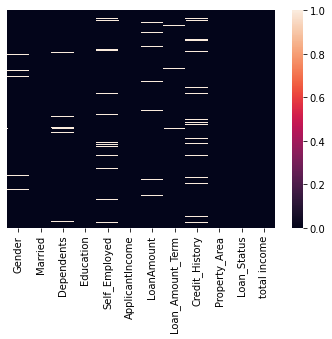

In [8]:

# heatmap representing where the null values are present
sns.heatmap(k,yticklabels=False)


In [9]:
# counts of null values per each column
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
total income         0
dtype: int64

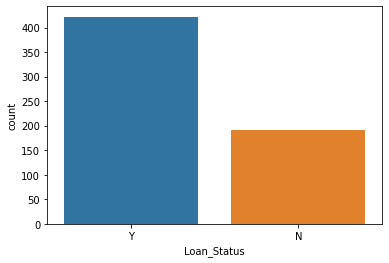

In [10]:
sns.countplot('Loan_Status',data=df)

In [11]:
print((df['Loan_Status']=='Y').sum())
print((df['Loan_Status']=='N').sum())


422
192


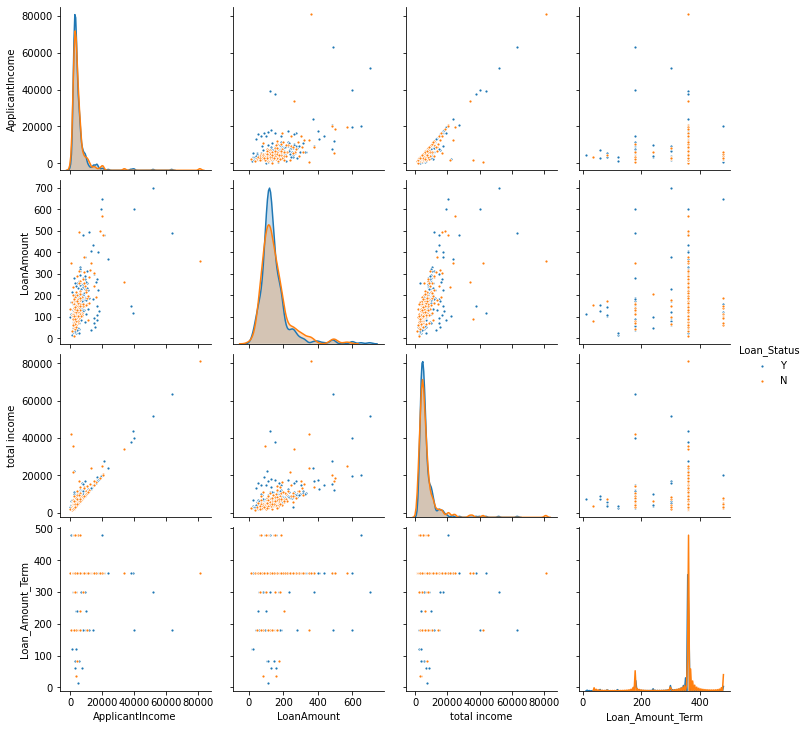

In [12]:
sns.pairplot(data=df,vars=['ApplicantIncome','LoanAmount','total income','Loan_Amount_Term'],hue='Loan_Status',markers='.')
# using this pairplot the conclusions that can be made are
#1. There are many rejected points with very low applicant income similary for total income also
#2. For higher loan amount term and low applicant income also there are many rejected points
#3. For higher loan amount term and low loan amount also there are many rejected points

In [13]:
df.corr()
# Appliant income and total income are highly correlated
# The correlation coefficient between total income and loan amount is 0.62 which indicates people with high total income are mostly asking for high loan amount

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total income
ApplicantIncome,1.000000,0.570909,-0.045306,-0.014715,0.893037
LoanAmount,0.570909,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,-0.045306,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.014715,-0.008433,0.001470,1.000000,-0.015109
total income,0.893037,0.624621,-0.069948,-0.015109,1.000000


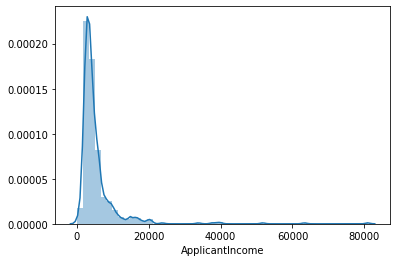

In [14]:
sns.distplot(df['ApplicantIncome'],bins=50)

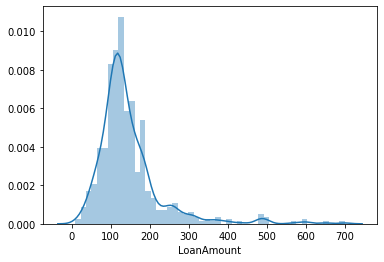

In [15]:
sns.distplot(df['LoanAmount'],bins=50)

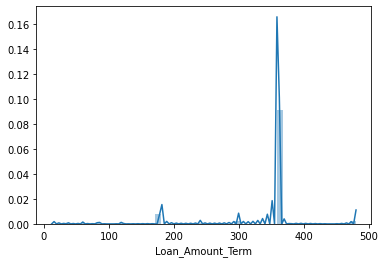

In [16]:
sns.distplot(df['Loan_Amount_Term'],bins=50)
# This disribution is concentrated on only some points. So we can make it as a categorical variable

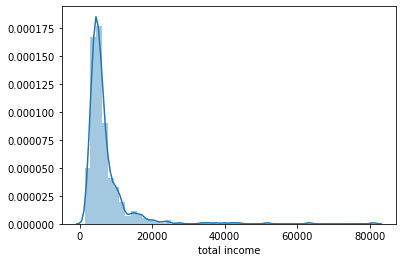

In [17]:
sns.distplot(df['total income'],bins=50)

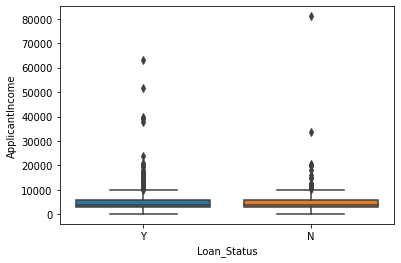

In [18]:
sns.boxplot(data=df,y='ApplicantIncome',x='Loan_Status')

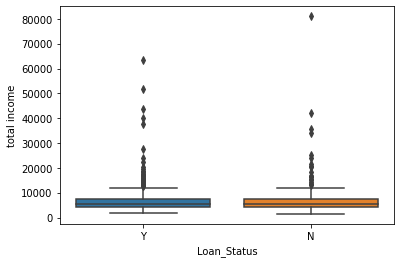

In [19]:
sns.boxplot(data=df,y='total income',x='Loan_Status')

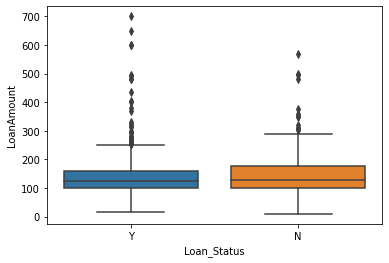

In [20]:
sns.boxplot(data=df,y='LoanAmount',x='Loan_Status')

In [21]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
total income        float64
dtype: object

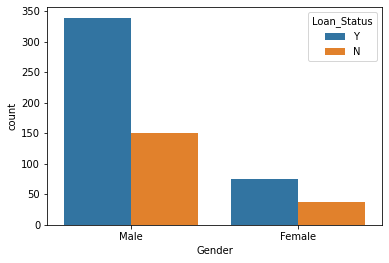

In [22]:
sns.countplot('Gender',data=df,hue='Loan_Status')

In [23]:
# reaplcing missing values of gender with mode 
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [25]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [26]:
# If married there is a high chance of having coapplicant income also 
for i in range(0,len(df)):
    if(df['Married'][i]!='Yes' and df['Married'][i]!='No'):
        if(df['total income'][i]>df['ApplicantIncome'][i]):
            df['Married'][i]='Yes'
        else:
            df['Married'][i]='No'
            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
df['Married'].isnull().sum()

0

In [28]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

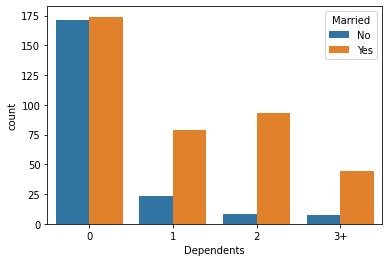

In [29]:
sns.countplot('Dependents',data=df,hue='Married')

In [30]:
# Take dependents as 1 if married else 0 (just based on probability)
for i in range(0,len(df)):
    if(df['Dependents'][i] not in ['0','1','2','3+']):
        if(df['Married'][i]=='Yes'):
            df['Dependents'][i]='1'
        else:
            
            df['Dependents'][i]='0'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

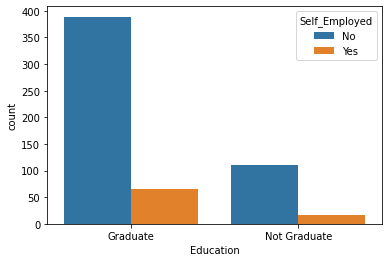

In [32]:
sns.countplot('Education',data=df,hue='Self_Employed')

In [33]:
# Most of the educated are not self employed
for i in range(0,len(df)):
    if(df['Self_Employed'][i] not in ['Yes','No']):
        if(df['Education'][i]=='Graduate'):
            df['Self_Employed'][i]='Yes'
        else:
            df['Self_Employed'][i]='No'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [34]:
m=df['LoanAmount'].median()

In [35]:
# Replacing missing values of loan amount with median(as mean can be affected by outliers)
df['LoanAmount'].fillna(m,inplace=True)

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
# Replacing missing values of Loan_Amount_Term with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

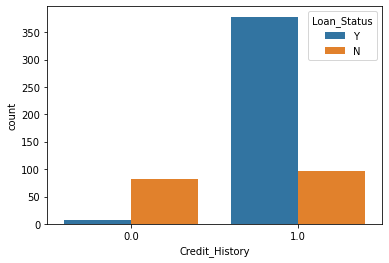

In [39]:
sns.countplot('Credit_History',data=df,hue='Loan_Status')

In [40]:
# If loan is accepted then replace missing values of credit history with 1 else with 0 
for i in range(0,len(df)):
    if(df['Credit_History'][i]!=0 and df['Credit_History'][i]!=1):
        if(df['Loan_Status'][i]=='Y'):
            df['Credit_History'][i]=1.0
        elif(df['Loan_Status'][i]=='N'):
            df['Credit_History'][i]=0.0    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
df.isnull().sum()


Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
total income        0
dtype: int64

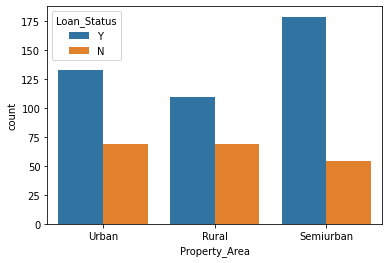

In [42]:
# In all the areas loans are getting accepted but in case of semi urban the acceptance rate is high
sns.countplot('Property_Area',data=df,hue='Loan_Status')

In [43]:
# removing outliers by looking at loan amount
df= df[df['LoanAmount']<400]

In [44]:
len(df)

599

In [45]:
# removing outliers by looking at total income
df= df[df['total income']<24000]
len(df)

593

In [46]:
# encoding object type features
df_cat=pd.get_dummies(df)

In [47]:
df_cat.shape

(593, 22)

In [48]:
df_cat=df_cat.drop(columns=['Loan_Status_N','Loan_Status_Y'])
df_cat['Loan_Status']=df['Loan_Status']

In [49]:
# converting loan amount term to categorical
df_cat['Loan_Amount_Term']=df_cat['Loan_Amount_Term'].astype(object)
df_cat['Loan_Amount_Term'].dtype

dtype('O')

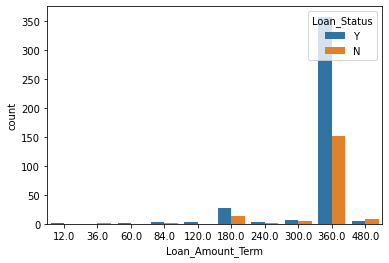

In [50]:
sns.countplot('Loan_Amount_Term',data=df_cat,hue='Loan_Status')

In [51]:
df_cat=pd.get_dummies(df_cat)
df_cat.shape

(593, 31)

In [52]:
df_cat.dtypes

ApplicantIncome              int64
LoanAmount                 float64
Credit_History             float64
total income               float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Amount_Term_12.0        uint8
Loan_Amount_Term_36.0        uint8
Loan_Amount_Term_60.0        uint8
Loan_Amount_Term_84.0        uint8
Loan_Amount_Term_120.0       uint8
Loan_Amount_Term_180.0       uint8
Loan_Amount_Term_240.0       uint8
Loan_Amount_Term_300.0       uint8
Loan_Amount_Term_360.0       uint8
Loan_Amount_Term_480

In [53]:
# scaling all the variables such that mean is 0 and std is 1
#df_cat['LoanAmount']=(df_cat['LoanAmount']-df_cat['LoanAmount'].mean())/df_cat['LoanAmount'].std()
#df_cat['total income']=(df_cat['total income']-df_cat['total income'].mean())/df_cat['total income'].std()
#df_cat['ApplicantIncome']=(df_cat['ApplicantIncome']-df_cat['ApplicantIncome'].mean())/df_cat['ApplicantIncome'].std()

In [54]:
df_cat=df_cat.drop(columns=['Loan_Status_N','Loan_Status_Y'])
df_cat['Loan_Status']=df['Loan_Status']

In [55]:
X=df_cat.drop(columns=['Loan_Status'])
y=df_cat['Loan_Status']
y=y.map({'Y':1,'N':0})

In [56]:
print(y.head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


In [57]:
#Splitting the model into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_train)

444

In [58]:
X_train.columns

Index(['ApplicantIncome', 'LoanAmount', 'Credit_History', 'total income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0'],
      dtype='object')

In [59]:
# Model based feature selection using random forest model
from sklearn.ensemble import  RandomForestClassifier 
r= RandomForestClassifier(max_depth=4, random_state=42,n_estimators=8,max_features=int(pow(len(X_train.columns),0.5)))

In [60]:
r.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [61]:
k=r.feature_importances_
k

array([0.04653075, 0.0485259 , 0.40177164, 0.07488983, 0.01089565,
       0.00396619, 0.04762024, 0.00343168, 0.01013966, 0.00963567,
       0.0183334 , 0.02990671, 0.00903074, 0.01724103, 0.02220256,
       0.00879123, 0.12154646, 0.00969585, 0.00747452, 0.        ,
       0.00477046, 0.        , 0.00186889, 0.        , 0.00529434,
       0.01099198, 0.02489757, 0.00701851, 0.04352854])

<BarContainer object of 29 artists>

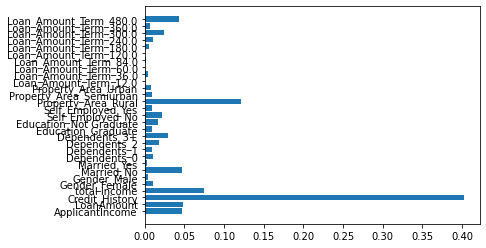

In [62]:
plt.barh(X_train.columns,k)

In [63]:
# selcting top 12 features based on feature importances 
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(r,max_features=12,threshold=-np.inf,prefit=True)

In [64]:
feature_idx = select.get_support()

In [65]:
feature_idx

array([ True,  True,  True,  True, False, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True])

In [66]:
X

,ApplicantIncome,LoanAmount,Credit_History,total income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,5849,128.0,1.0,5849.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4583,128.0,1.0,6091.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3000,66.0,1.0,3000.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2583,120.0,1.0,4941.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,6000,141.0,1.0,6000.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1.0,2900.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
610,4106,40.0,1.0,4106.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
611,8072,253.0,1.0,8312.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
612,7583,187.0,1.0,7583.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [67]:
feature_name = X.columns[feature_idx]

In [68]:
feature_name

Index(['ApplicantIncome', 'LoanAmount', 'Credit_History', 'total income',
       'Married_No', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_No', 'Property_Area_Rural', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_480.0'],
      dtype='object')

In [69]:
X=select.transform(X)

In [70]:
X.shape

(593, 12)

In [71]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [72]:
X[0]

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
588    2900.0
589    4106.0
590    8072.0
591    7583.0
592    4583.0
Name: 0, Length: 593, dtype: float64

In [73]:
# After feature selection dividing into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
len(X_train)

444

In [74]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [75]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
422,3750.0,100.0,1.0,3750.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
413,14880.0,96.0,1.0,14880.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,2600.0,115.0,1.0,6100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,4350.0,154.0,1.0,4350.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
315,3166.0,132.0,1.0,6151.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,6080.0,182.0,0.0,8649.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
144,2330.0,100.0,1.0,6816.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72,3500.0,81.0,1.0,3500.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
235,2510.0,140.0,1.0,4493.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
#scaling the numerical columns such that mean is 0 and standard deviation is 1
p_mean=X_train[0].mean()
q_mean=X_train[1].mean()
r_mean=X_train[3].mean()
p_std=X_train[0].std()
q_std=X_train[1].std()
r_std=X_train[3].std()
X_train[0]=(X_train[0]-p_mean)/p_std
X_train[1]=(X_train[1]-q_mean)/q_std
X_train[3]=(X_train[3]-r_mean)/r_std
X_test[0]=(X_test[0]-p_mean)/p_std
X_test[1]=(X_test[1]-q_mean)/q_std
X_test[3]=(X_test[3]-r_mean)/r_std

In [77]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
422,-0.299487,-0.617478,1.0,-0.736854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
413,3.257583,-0.686951,1.0,2.717713,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,-0.667019,-0.356952,1.0,-0.007453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,-0.107732,0.320416,1.0,-0.550623,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
315,-0.486130,-0.061689,1.0,0.008377,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.445164,0.806730,0.0,0.783715,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
144,-0.753309,-0.617478,1.0,0.214782,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72,-0.379386,-0.947477,1.0,-0.814449,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
235,-0.695783,0.077258,1.0,-0.506239,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [78]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
518,-0.682999,-0.165899,1.0,-0.475511,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
347,1.165207,0.511468,1.0,1.668617,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
395,-0.044772,-0.356952,1.0,-0.489478,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
498,-0.817228,-1.138529,1.0,0.829341,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
460,-0.698979,-0.739056,1.0,-1.124833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
342,1.298478,2.995148,1.0,2.108431,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
68,0.771149,-0.183268,1.0,0.302931,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
459,0.001250,-0.617478,1.0,-0.444783,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.419597,0.094626,1.0,-0.038491,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
y_train

,Loan_Status
434,1
424,1
19,1
480,1
323,1
...,...
129,0
145,1
72,1
241,0


In [80]:
y_test

,Loan_Status
535,1
356,1
405,1
513,0
473,1
...,...
351,0
68,1
472,1
4,1


In [81]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [82]:
X_train.shape

(444, 12)

In [83]:
y_test.shape

(149, 1)

In [84]:
y_train=y_train.reshape(444,)
y_test=y_test.reshape(149,)

In [85]:
# buiding a logistic regression model
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [86]:
l.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred=l.predict(X_test)

In [88]:
# measuring accuracy of test set
((y_pred==y_test).sum())/len(X_test)

0.825503355704698

In [89]:
# measuring accuracy of training set
(((l.predict(X_train))==y_train).sum())/len(X_train)

0.8378378378378378

In [90]:
# using confusion matrix to classify the predictions into TP,TN,FP,FN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 23,  25],
       [  1, 100]])

In [91]:
# knowing the recall and precision using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['N','Y']))

              precision    recall  f1-score   support

           N       0.96      0.48      0.64        48
           Y       0.80      0.99      0.88       101

    accuracy                           0.83       149
   macro avg       0.88      0.73      0.76       149
weighted avg       0.85      0.83      0.81       149



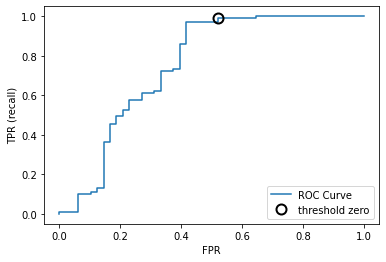

In [92]:
# ROC curve for logistic regression
from sklearn.metrics import roc_curve 
fpr1, tpr1, thresholds1 = roc_curve(y_test, l.decision_function(X_test))
plt.plot(fpr1, tpr1, label="ROC Curve") 
plt.xlabel("FPR") 
plt.ylabel("TPR (recall)") 
# find threshold closest to zero 
close_zero = np.argmin(np.abs(thresholds1)) 
plt.plot(fpr1[close_zero], tpr1[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)

In [93]:
# Building a SVC model
from sklearn.svm import SVC
svc=SVC()

In [94]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_pr=svc.predict(X_test)

In [96]:
((y_pr==y_test).sum())/len(X_test)

0.825503355704698

In [97]:
(((svc.predict(X_train))==y_train).sum())/len(X_train)

0.8378378378378378

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pr)

array([[ 23,  25],
       [  1, 100]])

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pr,target_names=['N','Y']))

              precision    recall  f1-score   support

           N       0.96      0.48      0.64        48
           Y       0.80      0.99      0.88       101

    accuracy                           0.83       149
   macro avg       0.88      0.73      0.76       149
weighted avg       0.85      0.83      0.81       149



In [100]:
from sklearn.ensemble import RandomForestClassifier
ran= RandomForestClassifier(n_estimators=90, random_state=2,max_depth=3,max_features= 3)

In [101]:
ran.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [102]:
k=ran.predict(X_test)

In [103]:
((k==y_test).sum())/len(X_test)

0.825503355704698

In [104]:
(((ran.predict(X_train))==y_train).sum())/len(X_train)

0.8423423423423423

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,k)

array([[ 23,  25],
       [  1, 100]])

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pr,target_names=['N','Y']))

              precision    recall  f1-score   support

           N       0.96      0.48      0.64        48
           Y       0.80      0.99      0.88       101

    accuracy                           0.83       149
   macro avg       0.88      0.73      0.76       149
weighted avg       0.85      0.83      0.81       149



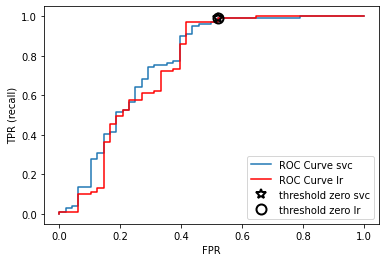

In [107]:
# Combining ROC curves of both SVC and Logisticregression
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, l.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve svc") 
plt.plot(fpr1, tpr1, label="ROC Curve lr",c='r') 
plt.xlabel("FPR") 
plt.ylabel("TPR (recall)") 
# find threshold closest to zero 
close_zero = np.argmin(np.abs(thresholds))
close_zero1 = np.argmin(np.abs(thresholds1))
plt.plot(fpr[close_zero], tpr[close_zero], '*', markersize=10,label="threshold zero svc", fillstyle="none", c='k', mew=2) 
plt.plot(fpr1[close_zero1], tpr1[close_zero1], 'o', markersize=10,label="threshold zero lr", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)

In [108]:
# Finding the area under the ROC curves of both the models
from sklearn.metrics import roc_auc_score 
lr_auc = roc_auc_score(y_test, l.predict_proba(X_test)[:, 1]) 
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test)) 
print("AUC for Logistic regression: ",lr_auc) 
print("AUC for SVC: ",svc_auc)

AUC for Logistic regression:  0.7528877887788779
AUC for SVC:  0.7708333333333333
